In [45]:
import librosa
import librosa.display
import numpy as np
y, sr = librosa.load('C:/nmb/nmb_data/testvoice_M2.wav')
S = np.abs(librosa.stft(y))
print(S)
print(len(S))
print(S.shape)

[[3.25800478e-01 1.78371489e-01 2.78488211e-02 ... 3.17018002e-01
  1.76064789e-01 2.62978017e-01]
 [2.28226677e-01 1.97357506e-01 1.26243206e-02 ... 1.42036885e-01
  2.68297136e-01 4.01224494e-01]
 [2.27619633e-01 2.85097927e-01 1.50360674e-01 ... 2.87735075e-01
  2.14451239e-01 5.86792052e-01]
 ...
 [6.71984744e-04 3.36323632e-04 6.63726951e-07 ... 5.43531223e-06
  1.06936925e-04 3.91005044e-04]
 [6.77501317e-04 3.39268736e-04 1.60758691e-06 ... 2.10438725e-06
  1.02762329e-04 3.81447637e-04]
 [6.79563673e-04 3.40226252e-04 3.70412636e-07 ... 3.96306541e-06
  9.74248396e-05 3.74918251e-04]]
1025
(1025, 216)


In [44]:
# hop_length, n_fft 수정해봤지만 그래프상으로 차이가 없음
p0 = librosa.feature.poly_features(S=S, order=0) #, n_fft=128)# hop_length=128)   
# print(p0)
print(p0.shape)
p1 = librosa.feature.poly_features(S=S, order=1) #, n_fft=128)# hop_length=128)
# print(p1)
print(p1.shape)
p2 = librosa.feature.poly_features(S=S, order=2) #, n_fft=128)# hop_length=128)
# print(p2)
print(p2.shape)

pmax = librosa.feature.poly_features(S=S, order=76) # order = 77 부터 오류남
print(pmax.shape)

(1, 216)
(2, 216)
(3, 216)
(77, 216)
<ipython-input-44-2ad74f880d95>:12: RankWarning: Polyfit may be poorly conditioned
  pmax = librosa.feature.poly_features(S=S, order=76)


C:\Users\ai\Anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\ai\Anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\ai\Anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


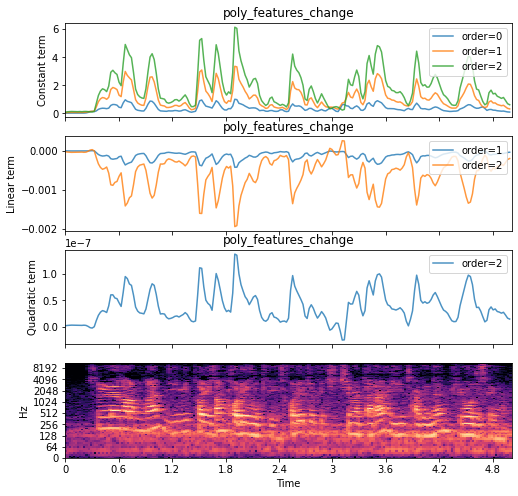

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=4, sharex=True, figsize=(8, 8))
times = librosa.times_like(p0)

ax[0].set_title("poly_features_change")
ax[0].plot(times, p0[0], label='order=0', alpha=0.8)
ax[0].plot(times, p1[1], label='order=1', alpha=0.8)
ax[0].plot(times, p2[2], label='order=2', alpha=0.8)
ax[0].set(ylabel='Constant term')   # Constant term : 상수항 ex) x^2 + 2x + 3 일 경우 상수항은 3
ax[0].legend(loc='upper right')
ax[0].label_outer()


ax[1].set_title("poly_features_change")
ax[1].plot(times, p1[0], label='order=1', alpha=0.8)
ax[1].plot(times, p2[1], label='order=2', alpha=0.8)
ax[1].set(ylabel='Linear term')     # Linear term : 일차항 ex) x^2 + 2x + 3 일 경우 일차항은 2
ax[1].legend(loc='upper right')
ax[1].label_outer


ax[2].set_title("poly_features_change")
ax[2].plot(times, p2[0], label='order=2', alpha=0.8)
ax[2].set(ylabel='Quadratic term')  # Quadratic term 이차항 ex) x^2 + 2x + 3 일 경우 이차항은 1
ax[2].legend(loc='upper right')
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[3])